AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [29]:
import pandas as pd

df = pd.read_csv('titanic.csv')

print(pd.concat([df.head(10), df.tail(20)]))

print(df.describe())

print(df.info())


     PassengerId Survived  Pclass  \
0              1        0       3   
1              2        1       1   
2              3        1       3   
3              4        1       1   
4              5        0       3   
5              6        0       3   
6              7        0       1   
7              8        0       3   
8              9        1       3   
9             10        1       2   
871          872        1       1   
872          873        0       1   
873          874        0       3   
874          875        1       2   
875          876        1       3   
876          877        0       3   
877          878        0       3   
878          879        0       3   
879          880        1       1   
880          881        1       2   
881          882        0       3   
882          883        0       3   
883          884        0       2   
884          885        0       3   
885          886        0       3   
886          887        0       2   
8

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


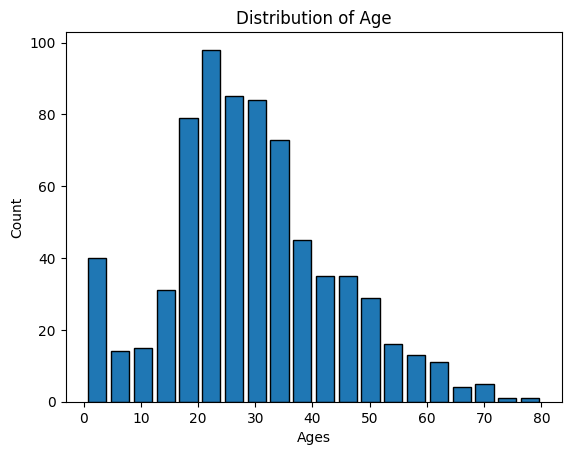

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
missing_values = df.isnull().sum()
print(missing_values)

plt.hist(df['Age'], bins=20, edgecolor='black', rwidth=0.8)
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


central_tendency = df['Age'].median
df['Age'].fillna(central_tendency, inplace=True)

cabin_missing_persentage = df['Cabin'].isnull().mean()

if cabin_missing_persentage > 0.5:
    df.drop('Cabin', axis=1, inplace=True) 
else:
    df['Cabin'].fillna('Unknown', inplace=True)

embark_missing_value = df['Embarked'].isnull().mode()

df['Embarked'].fillna(embark_missing_value, inplace=True)


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

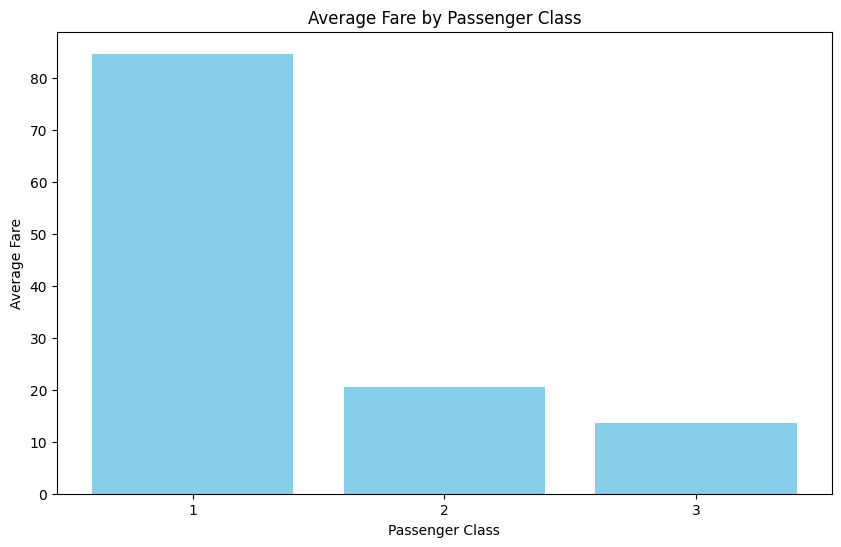

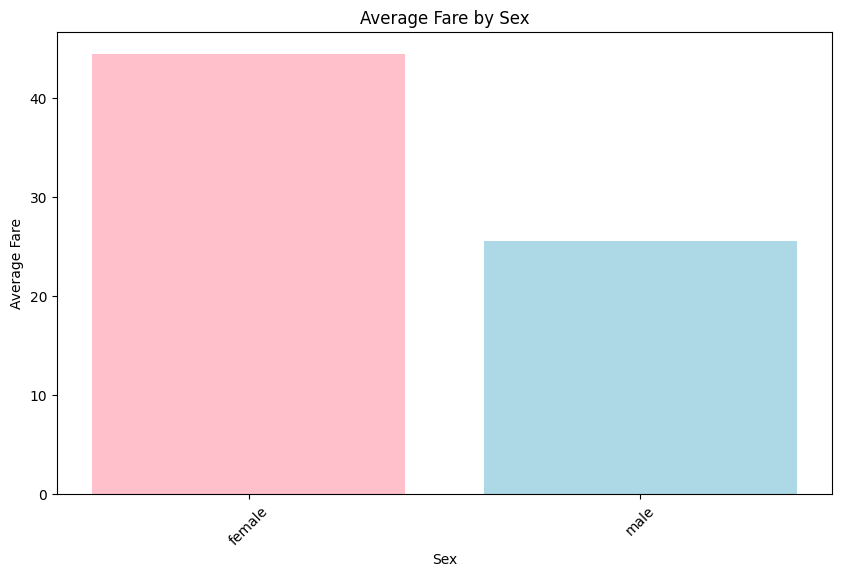

In [3]:
import pandas as pd  
import matplotlib.pyplot as plt  
  

df = pd.read_csv('titanic.csv')  
  

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')  
  

average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()  
  

plt.figure(figsize=(10, 6))  
plt.bar(average_fare_by_pclass['Pclass'], average_fare_by_pclass['Fare'], color='skyblue')  
plt.xlabel('Passenger Class')  
plt.ylabel('Average Fare')  
plt.title('Average Fare by Passenger Class')  
plt.xticks(average_fare_by_pclass['Pclass'])  
plt.show()

 
average_fare_by_sex = df.groupby('Sex')['Fare'].mean().reset_index()  
 

plt.figure(figsize=(10, 6))  
plt.bar(average_fare_by_sex['Sex'], average_fare_by_sex['Fare'], color=['pink', 'lightblue'])  
plt.xlabel('Sex')  
plt.ylabel('Average Fare')  
plt.title('Average Fare by Sex')  
plt.xticks(rotation=45)    
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

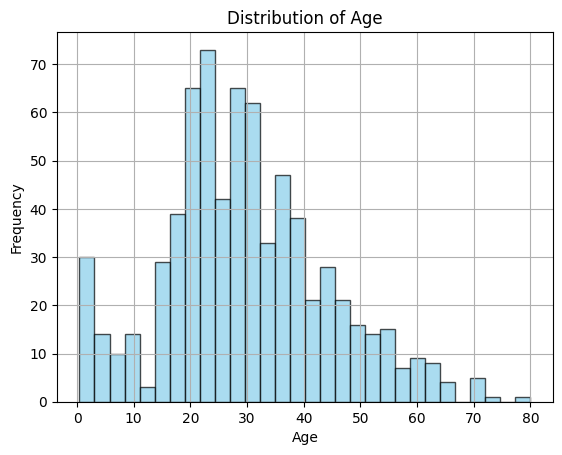

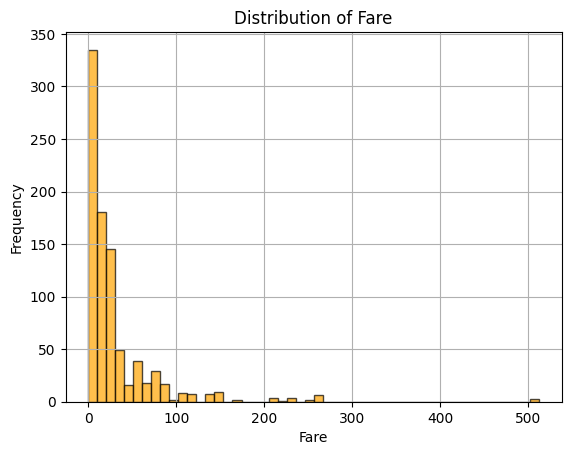

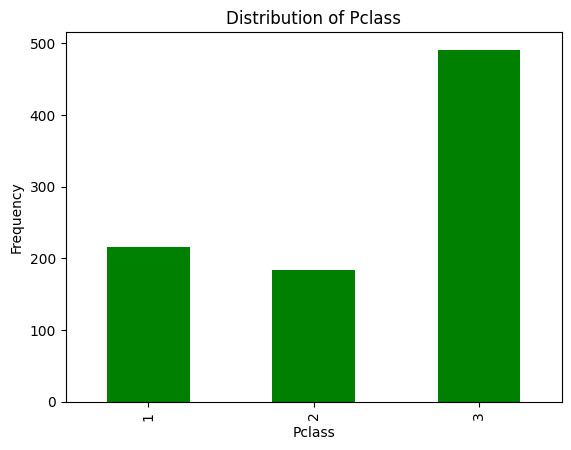

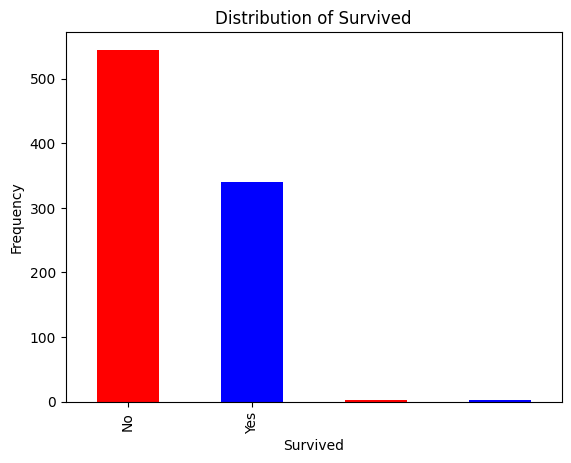

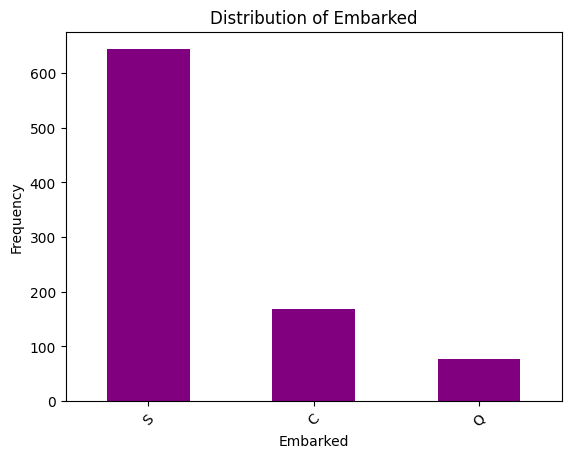

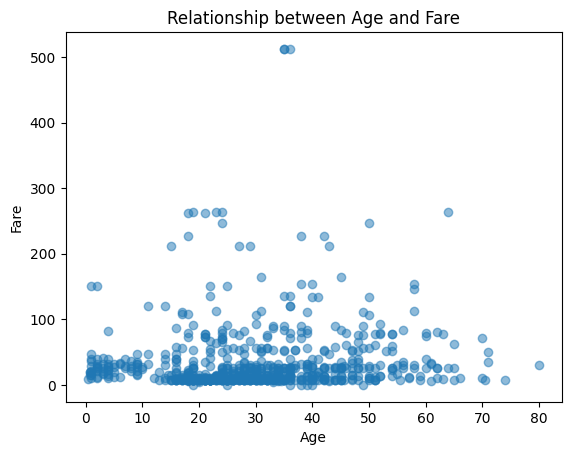

In [6]:
import pandas as pd  
import matplotlib.pyplot as plt  
  
# Assuming df is your DataFrame  
df['Age'].hist(bins=30, color='skyblue', alpha=0.7, edgecolor='black')  
plt.title('Distribution of Age')  
plt.xlabel('Age')  
plt.ylabel('Frequency')  
plt.show()

df['Fare'].hist(bins=50, color='orange', alpha=0.7, edgecolor='black')  
plt.title('Distribution of Fare')  
plt.xlabel('Fare')  
plt.ylabel('Frequency')  
plt.show()

df['Pclass'].value_counts().sort_index().plot(kind='bar', color='green')  
plt.title('Distribution of Pclass')  
plt.xlabel('Pclass')  
plt.ylabel('Frequency')  
plt.show()

df['Survived'].value_counts().plot(kind='bar', color=['red', 'blue'])  
plt.title('Distribution of Survived')  
plt.xlabel('Survived')  
plt.ylabel('Frequency')  
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()

df['Embarked'].value_counts().plot(kind='bar', color='purple')  
plt.title('Distribution of Embarked')  
plt.xlabel('Embarked')  
plt.ylabel('Frequency')  
plt.xticks(rotation=45)  
plt.show()

plt.scatter(df['Age'], df['Fare'], alpha=0.5)  
plt.title('Relationship between Age and Fare')  
plt.xlabel('Age')  
plt.ylabel('Fare')  
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [7]:
import pandas as pd

correlation_matrix = df.corr()
print(correlation_matrix)

age_fare_correlation = correlation_matrix.loc['Age', 'Fare']  
print(f"Correlation between Age and Fare: {age_fare_correlation}")  
  
age_fare_correlation_direct = df['Age'].corr(df['Fare'])  
print(f"Direct correlation between Age and Fare: {age_fare_correlation_direct}")


significant_correlations = correlation_matrix[(correlation_matrix.abs() > 0.5)]  

significant_correlations = significant_correlations.stack().reset_index()  
significant_correlations.columns = ['Feature1', 'Feature2', 'Correlation']  

print(significant_correlations)

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.013500
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.550122
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096511
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159746
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216417
Fare            0.013500 -0.550122  0.096511  0.159746  0.216417  1.000000
Correlation between Age and Fare: 0.09651129963357943
Direct correlation between Age and Fare: 0.09651129963357949
      Feature1     Feature2  Correlation
0  PassengerId  PassengerId     1.000000
1       Pclass       Pclass     1.000000
2       Pclass         Fare    -0.550122
3          Age          Age     1.000000
4        SibSp        SibSp     1.000000
5        Parch        Parch     1.000000
6         Fare       Pclass    -0.550122
7         Fare         Fare     